
Deniz Koç

Melih Kurtaran

Eylül Onar

#Load the data

In [ ]:
import pandas as pd 
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('mode.chained_assignment', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Name your files as "kaggle_train.xlsx" and test.xlsx**

In [ ]:
from os.path import join  # merging paths in a better way

data_path = "/content/drive/My Drive/"
filename = "kaggle_train.xlsx"
filename2 = "test.xlsx"

df = pd.read_excel(join(data_path, filename),header=0)
test_df = pd.read_excel(join(data_path, filename2),header=0)

df.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer

# **Preprocess the Data**

In [ ]:
df.shape

(5529, 54)

In [ ]:
test_df.shape

(1000, 53)

## **NaN Values**

In [ ]:
#Print number of NaN values

df.isna().sum()

ID                                           0
GenderSelect                                10
Country                                     16
Age                                         68
EmploymentStatus                             0
CodeWriter                                   0
CurrentJobTitleSelect                        2
TitleFit                                   102
CurrentEmployerType                         71
MLToolNextYearSelect                       231
MLMethodNextYearSelect                     277
LanguageRecommendationSelect               195
LearningPlatformUsefulnessBlogs           2998
LearningPlatformUsefulnessKaggle          2361
LearningPlatformUsefulnessCourses         2588
LearningPlatformUsefulnessProjects        3030
LearningPlatformUsefulnessSO              2533
LearningPlatformUsefulnessTextbook        3327
LearningPlatformUsefulnessYouTube         3116
DataScienceIdentitySelect                 1545
FormalEducation                              7
MajorSelect  

In [ ]:
df.isnull().mean() #percentages

ID                                        0.000000
GenderSelect                              0.001809
Country                                   0.002894
Age                                       0.012299
EmploymentStatus                          0.000000
CodeWriter                                0.000000
CurrentJobTitleSelect                     0.000362
TitleFit                                  0.018448
CurrentEmployerType                       0.012841
MLToolNextYearSelect                      0.041780
MLMethodNextYearSelect                    0.050099
LanguageRecommendationSelect              0.035269
LearningPlatformUsefulnessBlogs           0.542232
LearningPlatformUsefulnessKaggle          0.427021
LearningPlatformUsefulnessCourses         0.468077
LearningPlatformUsefulnessProjects        0.548020
LearningPlatformUsefulnessSO              0.458130
LearningPlatformUsefulnessTextbook        0.601736
LearningPlatformUsefulnessYouTube         0.563574
DataScienceIdentitySelect      

In [ ]:
#We have 5529 samples if more than 70% of samples are NaN values then we will not use that column

#df_dropped = df[df.columns[df.isnull().mean() < 0.3]]
df_dropped = df
df_dropped.shape

(5529, 54)

In [ ]:
#test_df = test_df[test_df.columns[test_df.isnull().mean() < 0.3]]
test_df.shape

(1000, 53)

We have dropped 10 columns which has more than 60% of NaN values

In [ ]:
df_dropped.dtypes

ID                                          int64
GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CodeWriter                                 object
CurrentJobTitleSelect                      object
TitleFit                                   object
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs            object
LearningPlatformUsefulnessKaggle           object
LearningPlatformUsefulnessCourses          object
LearningPlatformUsefulnessProjects         object
LearningPlatformUsefulnessSO               object
LearningPlatformUsefulnessTextbook         object
LearningPlatformUsefulnessYouTube          object
DataScienceIdentitySelect                  object


In [ ]:
# Now we will impute NaN values with mean and mode values
# For numerical values with mean, for non-numerical values with mode

df_dropped['Age'] = df_dropped['Age'].fillna(df_dropped['Age'].mean())
df_dropped['CompensationScore'] = df_dropped['CompensationScore'].fillna(df_dropped['CompensationScore'].mean())


In [ ]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['CompensationScore'] = test_df['CompensationScore'].fillna(test_df['CompensationScore'].mean())

In [ ]:
for col in df_dropped.columns:
  df_dropped[col] = df_dropped[col].fillna(df_dropped[col].mode()[0])

for col in test_df.columns:
  test_df[col] = test_df[col].fillna(test_df[col].mode()[0]) 

In [ ]:
df_dropped.isna().sum()

ID                                        0
GenderSelect                              0
Country                                   0
Age                                       0
EmploymentStatus                          0
CodeWriter                                0
CurrentJobTitleSelect                     0
TitleFit                                  0
CurrentEmployerType                       0
MLToolNextYearSelect                      0
MLMethodNextYearSelect                    0
LanguageRecommendationSelect              0
LearningPlatformUsefulnessBlogs           0
LearningPlatformUsefulnessKaggle          0
LearningPlatformUsefulnessCourses         0
LearningPlatformUsefulnessProjects        0
LearningPlatformUsefulnessSO              0
LearningPlatformUsefulnessTextbook        0
LearningPlatformUsefulnessYouTube         0
DataScienceIdentitySelect                 0
FormalEducation                           0
MajorSelect                               0
Tenure                          

In [ ]:
df_dropped.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,Very useful,Very useful,Very useful,Very useful,Very useful,Very useful,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,"10,000 or more employees",Always,Random Forests,Often,Most of the time,Often,Most of the time,Most of the time,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,Often,8.000000,51-75% of projects,Approximately half internal and half external,Standalone Team,Sometimes,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,Most of the time,Sometimes,Most of the time,Often,Often,Often,Often,Often,Rarely,Often,Often,Most of the time,Often,Often,Often,Often,4.445003,100% of projects,More internal than external,Business Department,Sometimes,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,Very useful,Somewhat useful,Very useful,Very useful,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,Most of the time,Often,Often,Often,Often,Often,Sometimes,Often,Sometimes,Often,Sometimes,Most of the time,Often,Sometimes,Often,Most of the time,2.000000,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,Very useful,Very useful,Very useful,Very useful,Somewhat useful,Very useful,Somewhat useful,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...

## **Transforming Ordinal features**


TitleFit

In [ ]:
df_dropped['TitleFit'].value_counts()

Fine         3655
Perfectly    1125
Poorly        749
Name: TitleFit, dtype: int64

In [ ]:
TitleFit_map = {'Poorly':0,'Fine':1,'Perfectly':2}
df_dropped['TitleFit'] = df_dropped['TitleFit'].replace(TitleFit_map)
test_df['TitleFit'] = test_df['TitleFit'].replace(TitleFit_map)

LearningPlatformUsefulnessBlogs

In [ ]:
df_dropped['LearningPlatformUsefulnessBlogs'].value_counts()

Very useful        4257
Somewhat useful    1251
Not Useful           21
Name: LearningPlatformUsefulnessBlogs, dtype: int64

In [ ]:
map = {'Not Useful':0,'Somewhat useful':1,'Very useful':2}

df_dropped['LearningPlatformUsefulnessBlogs'] = df_dropped['LearningPlatformUsefulnessBlogs'].replace(map)
test_df['LearningPlatformUsefulnessBlogs'] = test_df['LearningPlatformUsefulnessBlogs'].replace(map)

LearningPlatformUsefulnessKaggle

In [ ]:
df_dropped['LearningPlatformUsefulnessKaggle'].value_counts()

Very useful        4183
Somewhat useful    1320
Not Useful           26
Name: LearningPlatformUsefulnessKaggle, dtype: int64

In [ ]:
df_dropped['LearningPlatformUsefulnessKaggle'] = df_dropped['LearningPlatformUsefulnessKaggle'].replace(map)
test_df['LearningPlatformUsefulnessKaggle'] = test_df['LearningPlatformUsefulnessKaggle'].replace(map)

LearningPlatformUsefulnessCourses

In [ ]:
df_dropped['LearningPlatformUsefulnessCourses'] = df_dropped['LearningPlatformUsefulnessCourses'].replace(map)
test_df['LearningPlatformUsefulnessCourses'] = test_df['LearningPlatformUsefulnessCourses'].replace(map)

LearningPlatformUsefulnessProjects

In [ ]:
df_dropped['LearningPlatformUsefulnessProjects'] = df_dropped['LearningPlatformUsefulnessProjects'].replace(map)
test_df['LearningPlatformUsefulnessProjects'] = test_df['LearningPlatformUsefulnessProjects'].replace(map)

LearningPlatformUsefulnessSO

In [ ]:
df_dropped['LearningPlatformUsefulnessSO'] = df_dropped['LearningPlatformUsefulnessSO'].replace(map)
test_df['LearningPlatformUsefulnessSO'] = test_df['LearningPlatformUsefulnessSO'].replace(map)

LearningPlatformUsefulnessYouTube

In [ ]:
df_dropped['LearningPlatformUsefulnessYouTube'] = df_dropped['LearningPlatformUsefulnessYouTube'].replace(map)
test_df['LearningPlatformUsefulnessYouTube'] = test_df['LearningPlatformUsefulnessYouTube'].replace(map)

Tenure

In [ ]:
df_dropped['Tenure'].value_counts()

3 to 5 years                          1658
1 to 2 years                          1244
More than 10 years                    1163
6 to 10 years                          982
Less than a year                       462
I don't write code to analyze data      20
Name: Tenure, dtype: int64

In [ ]:
map = {"I don't write code to analyze data":0,"Less than a year":1,'1 to 2 years':2,'3 to 5 years':3,'6 to 10 years':4,'More than 10 years':5}

In [ ]:
df_dropped['Tenure'] = df_dropped['Tenure'].replace(map)
test_df['Tenure'] = test_df['Tenure'].replace(map)

EmployerSize

In [ ]:
df_dropped['EmployerSize'].value_counts()

10,000 or more employees    1673
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

In [ ]:
map = {"Fewer than 10 employees":0,"10 to 19 employees":1,'20 to 99 employees':2,'100 to 499 employees':3,'500 to 999 employees':4,'1,000 to 4,999 employees':5,'5,000 to 9,999 employees':6,'10,000 or more employees':7}

In [ ]:
df_dropped['EmployerSize'] = df_dropped['EmployerSize'].replace(map)
test_df['EmployerSize'] = test_df['EmployerSize'].replace(map)

In [ ]:
df_dropped['EmployerSize'].value_counts()

7                         1673
3                          841
2                          798
5                          736
4                          406
1                          314
6                          293
0                          291
I don't know               140
I prefer not to answer      37
Name: EmployerSize, dtype: int64

"I don't know" and "I prefer not to answer" values will be changed by the mean 

In [ ]:
sum = 0
for i in range(8):
  sum += df_dropped['EmployerSize'].value_counts()[i] * i 

avg = sum / 5352
print(avg)

4.335949177877429


In [ ]:
sum = 0
for i in range(8):
  sum += test_df['EmployerSize'].value_counts()[i] * i 

avg = sum / 1000
print(avg)

4.226


In [ ]:
map = {"I don't know":4.33,"I prefer not to answer":4.33}
df_dropped['EmployerSize'] = df_dropped['EmployerSize'].replace(map)
map2 = {"I don't know":4.226,"I prefer not to answer":4.226}
test_df['EmployerSize'] = test_df['EmployerSize'].replace(map2)
df_dropped['EmployerSize'].value_counts()

7.00    1673
3.00     841
2.00     798
5.00     736
4.00     406
1.00     314
6.00     293
0.00     291
4.33     177
Name: EmployerSize, dtype: int64

WorkProductionFrequency

In [ ]:
df_dropped['WorkProductionFrequency'].value_counts()

Sometimes           2353
Most of the time    1353
Rarely               848
Never                482
Always               361
Don't know           132
Name: WorkProductionFrequency, dtype: int64

In [ ]:
map = {'Never':0,'Rarely':1,'Sometimes':2,'Most of the time':3,'Always':4}
df_dropped['WorkProductionFrequency'] = df_dropped['WorkProductionFrequency'].replace(map)
test_df['WorkProductionFrequency'] = test_df['WorkProductionFrequency'].replace(map)
df_dropped['WorkProductionFrequency'].value_counts()

2             2353
3             1353
1              848
0              482
4              361
Don't know     132
Name: WorkProductionFrequency, dtype: int64

"Don't know" values will be changed by the mode 

In [ ]:
map = {"Don't know":2}
df_dropped['WorkProductionFrequency'] = df_dropped['WorkProductionFrequency'].replace(map)
test_df['WorkProductionFrequency'] = test_df['WorkProductionFrequency'].replace(map)
df_dropped['WorkProductionFrequency'].value_counts()

2    2485
3    1353
1     848
0     482
4     361
Name: WorkProductionFrequency, dtype: int64

WorkToolsFrequencyPython

In [ ]:
df_dropped['WorkToolsFrequencyPython'].value_counts()

Most of the time    3663
Often                882
Sometimes            744
Rarely               240
Name: WorkToolsFrequencyPython, dtype: int64

In [ ]:
map = {'Rarely':0,'Sometimes':1,'Often':2,'Most of the time':3}

df_dropped['WorkToolsFrequencyPython'] = df_dropped['WorkToolsFrequencyPython'].replace(map)
test_df['WorkToolsFrequencyPython'] = test_df['WorkToolsFrequencyPython'].replace(map)
df_dropped['WorkToolsFrequencyPython'].value_counts()

3    3663
2     882
1     744
0     240
Name: WorkToolsFrequencyPython, dtype: int64

WorkToolsFrequencyR

In [ ]:
df_dropped['WorkToolsFrequencyR'] = df_dropped['WorkToolsFrequencyR'].replace(map)
test_df['WorkToolsFrequencyR'] = test_df['WorkToolsFrequencyR'].replace(map)
df_dropped['WorkToolsFrequencyR'].value_counts()

3    3616
1     824
2     766
0     323
Name: WorkToolsFrequencyR, dtype: int64

WorkToolsFrequencySQL

In [ ]:
df_dropped['WorkToolsFrequencySQL'] = df_dropped['WorkToolsFrequencySQL'].replace(map)
test_df['WorkToolsFrequencySQL'] = test_df['WorkToolsFrequencySQL'].replace(map)
df_dropped['WorkToolsFrequencySQL'].value_counts()

3    4029
2     840
1     533
0     127
Name: WorkToolsFrequencySQL, dtype: int64

WorkMethodsFrequencyCross-Validation

In [ ]:
df_dropped['WorkMethodsFrequencyCross-Validation'] = df_dropped['WorkMethodsFrequencyCross-Validation'].replace(map)
test_df['WorkMethodsFrequencyCross-Validation'] = test_df['WorkMethodsFrequencyCross-Validation'].replace(map)
df_dropped['WorkMethodsFrequencyCross-Validation'].value_counts()

3    3946
2     984
1     526
0      73
Name: WorkMethodsFrequencyCross-Validation, dtype: int64

WorkMethodsFrequencyDataVisualization

In [ ]:
df_dropped['WorkMethodsFrequencyDataVisualization'] = df_dropped['WorkMethodsFrequencyDataVisualization'].replace(map)
test_df['WorkMethodsFrequencyDataVisualization'] = test_df['WorkMethodsFrequencyDataVisualization'].replace(map)
df_dropped['WorkMethodsFrequencyDataVisualization'].value_counts()

3    4119
2    1062
1     311
0      37
Name: WorkMethodsFrequencyDataVisualization, dtype: int64

WorkMethodsFrequencyDecisionTrees

In [ ]:
df_dropped['WorkMethodsFrequencyDecisionTrees'] = df_dropped['WorkMethodsFrequencyDecisionTrees'].replace(map)
test_df['WorkMethodsFrequencyDecisionTrees'] = test_df['WorkMethodsFrequencyDecisionTrees'].replace(map)
df_dropped['WorkMethodsFrequencyDecisionTrees'].value_counts()

2    3908
1     894
3     579
0     148
Name: WorkMethodsFrequencyDecisionTrees, dtype: int64

WorkMethodsFrequencyLogisticRegression

In [ ]:
df_dropped['WorkMethodsFrequencyLogisticRegression'] = df_dropped['WorkMethodsFrequencyLogisticRegression'].replace(map)
test_df['WorkMethodsFrequencyLogisticRegression'] = test_df['WorkMethodsFrequencyLogisticRegression'].replace(map)
df_dropped['WorkMethodsFrequencyLogisticRegression'].value_counts()

2    3713
1     914
3     753
0     149
Name: WorkMethodsFrequencyLogisticRegression, dtype: int64

WorkMethodsFrequencyRandomForests

In [ ]:
df_dropped['WorkMethodsFrequencyRandomForests'] = df_dropped['WorkMethodsFrequencyRandomForests'].replace(map)
test_df['WorkMethodsFrequencyRandomForests'] = test_df['WorkMethodsFrequencyRandomForests'].replace(map)
df_dropped['WorkMethodsFrequencyRandomForests'].value_counts()

2    4023
1     804
3     573
0     129
Name: WorkMethodsFrequencyRandomForests, dtype: int64

WorkMethodsFrequencyTimeSeriesAnalysis

In [ ]:
df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'] = df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'].replace(map)
df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'].value_counts()

2    4072
1     691
3     657
0     109
Name: WorkMethodsFrequencyTimeSeriesAnalysis, dtype: int64


WorkChallengeFrequencyDirtyData

In [ ]:
df_dropped['WorkChallengeFrequencyDirtyData'] = df_dropped['WorkChallengeFrequencyDirtyData'].replace(map)
test_df['WorkChallengeFrequencyDirtyData'] = test_df['WorkChallengeFrequencyDirtyData'].replace(map)
df_dropped['WorkChallengeFrequencyDirtyData'].value_counts()

3    3942
2    1119
1     449
0      19
Name: WorkChallengeFrequencyDirtyData, dtype: int64

WorkChallengeFrequencyTalent

In [ ]:
df_dropped['WorkChallengeFrequencyTalent'] = df_dropped['WorkChallengeFrequencyTalent'].replace(map)
test_df['WorkChallengeFrequencyTalent'] = test_df['WorkChallengeFrequencyTalent'].replace(map)
df_dropped['WorkChallengeFrequencyTalent'].value_counts()

2    4112
3     734
1     631
0      52
Name: WorkChallengeFrequencyTalent, dtype: int64

WorkDataVisualizations

In [ ]:
df_dropped['WorkDataVisualizations'].value_counts()

100% of projects             1051
76-99% of projects           1013
10-25% of projects            991
51-75% of projects            931
26-50% of projects            711
Less than 10% of projects     702
None                          130
Name: WorkDataVisualizations, dtype: int64

In [ ]:
map = {'Not Useful':0,'Somewhat useful':1,'Very useful':2}
test_df['LearningPlatformUsefulnessTextbook'] = test_df['LearningPlatformUsefulnessTextbook'].replace(map)

In [ ]:
map = {'None':0,'Less than 10% of projects':1,'10-25% of projects':2,'26-50% of projects':3,'51-75% of projects':4,'76-99% of projects':5,'100% of projects':6}

df_dropped['WorkDataVisualizations'] = df_dropped['WorkDataVisualizations'].replace(map)
test_df['WorkDataVisualizations'] = test_df['WorkDataVisualizations'].replace(map)
df_dropped['WorkDataVisualizations'].value_counts()

6    1051
5    1013
2     991
4     931
3     711
1     702
0     130
Name: WorkDataVisualizations, dtype: int64

RemoteWork

In [ ]:
df_dropped['RemoteWork'].value_counts()

Sometimes           2560
Rarely              1425
Never                684
Most of the time     555
Always               285
Don't know            20
Name: RemoteWork, dtype: int64

In [ ]:
map = {'Never':0,'Rarely':1,'Sometimes':2,"Don't know":2,'Most of the time':3,'Always':4}

df_dropped['RemoteWork'] = df_dropped['RemoteWork'].replace(map)
test_df['RemoteWork'] = test_df['RemoteWork'].replace(map)
df_dropped['RemoteWork'].value_counts()

2    2580
1    1425
0     684
3     555
4     285
Name: RemoteWork, dtype: int64

In [ ]:
df_dropped['WorkInternalVsExternalTools'].value_counts()

More internal than external                      2090
Entirely internal                                1568
Approximately half internal and half external     725
More external than internal                       538
Do not know                                       445
Entirely external                                 163
Name: WorkInternalVsExternalTools, dtype: int64

In [ ]:
map = {'Entirely external':0,'More external than internal':1,'Approximately half internal and half external':2,"Do not know":2,'More internal than external':3,'Entirely internal':4}
df_dropped['WorkInternalVsExternalTools'] = df_dropped['WorkInternalVsExternalTools'].replace(map)
test_df['WorkInternalVsExternalTools'] = test_df['WorkInternalVsExternalTools'].replace(map)
df_dropped['WorkInternalVsExternalTools'].value_counts()

3    2090
4    1568
2    1170
1     538
0     163
Name: WorkInternalVsExternalTools, dtype: int64

In [ ]:
df_dropped['DataScienceIdentitySelect'].value_counts()

Yes                       3232
No                        1210
Sort of (Explain more)    1087
Name: DataScienceIdentitySelect, dtype: int64

In [ ]:
map = {'No':0,'Sort of (Explain more)':1,'Yes':2}
df_dropped['DataScienceIdentitySelect'] = df_dropped['DataScienceIdentitySelect'].replace(map)
test_df['DataScienceIdentitySelect'] = test_df['DataScienceIdentitySelect'].replace(map)
df_dropped['DataScienceIdentitySelect'].value_counts()

2    3232
0    1210
1    1087
Name: DataScienceIdentitySelect, dtype: int64

## **More Preprocess**

ID is useless, so drop it

In [ ]:
df_dropped = df_dropped.drop(['ID'], axis = 1)
test_df = test_df.drop(['ID'], axis = 1)

Everyone is codewriter

In [ ]:
df_dropped['CodeWriter'].value_counts()

Yes    5529
Name: CodeWriter, dtype: int64

So we will drop codewriter column

In [ ]:
df_dropped = df_dropped.drop(['CodeWriter'], axis = 1)
test_df = test_df.drop(['CodeWriter'], axis = 1)

we will do one hot encoding for comma seperated values

In [ ]:
df_dropped['PastJobTitlesSelect'].value_counts()

Researcher                                                                                                                              561
Other                                                                                                                                   354
Software Developer/Software Engineer                                                                                                    233
Data Analyst                                                                                                                            156
Engineer                                                                                                                                155
                                                                                                                                       ... 
Business Analyst,Computer Scientist,Data Analyst,Data Scientist,Machine Learning Engineer,Predictive Modeler,Researcher,Statistician      1
Computer Scientist,D

In [ ]:
#df_dropped = df_dropped.drop(['PastJobTitlesSelect'], axis = 1)
#test_df = test_df.drop(['PastJobTitlesSelect'], axis = 1)
df_dropped = pd.concat([df_dropped.drop('PastJobTitlesSelect', 1), df_dropped['PastJobTitlesSelect'].str.get_dummies(sep=",")], 1)
test_df = pd.concat([test_df.drop('PastJobTitlesSelect', 1), test_df['PastJobTitlesSelect'].str.get_dummies(sep=",")], 1)

In [ ]:
df_dropped['MLSkillsSelect'].value_counts()

Supervised Machine Learning (Tabular Data)                                                                                                                                      822
Supervised Machine Learning (Tabular Data),Time Series                                                                                                                          231
Supervised Machine Learning (Tabular Data),Unsupervised Learning                                                                                                                229
Time Series                                                                                                                                                                     184
Supervised Machine Learning (Tabular Data),Time Series,Unsupervised Learning                                                                                                    163
                                                                                                    

In [ ]:
#df_dropped = df_dropped.drop(['MLSkillsSelect'], axis = 1)
#test_df = test_df.drop(['MLSkillsSelect'], axis = 1)
df_dropped = pd.concat([df_dropped.drop('MLSkillsSelect', 1), df_dropped['MLSkillsSelect'].str.get_dummies(sep=",")], 1)
test_df = pd.concat([test_df.drop('MLSkillsSelect', 1), test_df['MLSkillsSelect'].str.get_dummies(sep=",")], 1)

In [ ]:
df_dropped['MLTechniquesSelect'].value_counts()

Logistic Regression                                                                                                                                                                                                                            594
Decision Trees - Random Forests,Logistic Regression                                                                                                                                                                                            193
Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Logistic Regression                                                                                                                                                 115
Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Ensemble Methods,Gradient Boosting,Logistic Regression                                                                                                               98
Other (please specify; separ

In [ ]:
#df_dropped = df_dropped.drop(['MLTechniquesSelect'], axis = 1)
#test_df = test_df.drop(['MLTechniquesSelect'], axis = 1)
df_dropped = pd.concat([df_dropped.drop('MLTechniquesSelect', 1), df_dropped['MLTechniquesSelect'].str.get_dummies(sep=",")], 1)
test_df = pd.concat([test_df.drop('MLTechniquesSelect', 1), test_df['MLTechniquesSelect'].str.get_dummies(sep=",")], 1)

In [ ]:
df_dropped['WorkAlgorithmsSelect'].value_counts()

Regression/Logistic Regression                                                                                                      790
Decision Trees,Random Forests,Regression/Logistic Regression                                                                        163
Other                                                                                                                               161
Decision Trees,Regression/Logistic Regression                                                                                       145
Bayesian Techniques,Regression/Logistic Regression                                                                                  105
                                                                                                                                   ... 
Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,RNNs                                                                        1
CNNs,Ensemble Methods,Gradient Boosted Machines,

In [ ]:
#df_dropped = df_dropped.drop(['WorkAlgorithmsSelect'], axis = 1)
#test_df = test_df.drop(['WorkAlgorithmsSelect'], axis = 1)
df_dropped = pd.concat([df_dropped.drop('WorkAlgorithmsSelect', 1), df_dropped['WorkAlgorithmsSelect'].str.get_dummies(sep=",")], 1)
test_df = pd.concat([test_df.drop('WorkAlgorithmsSelect', 1), test_df['WorkAlgorithmsSelect'].str.get_dummies(sep=",")], 1)

In [ ]:
df_dropped['CurrentEmployerType'].value_counts()

Employed by a company that performs advanced analytics                                                                                                                                              1259
Employed by professional services/consulting firm                                                                                                                                                   1059
Employed by college or university                                                                                                                                                                    843
Employed by a company that doesn't perform advanced analytics                                                                                                                                        759
Employed by company that makes advanced analytic software                                                                                                                                           

In [ ]:
df_dropped = pd.concat([df_dropped.drop('CurrentEmployerType', 1), df_dropped['CurrentEmployerType'].str.get_dummies(sep=",")], 1)
test_df = pd.concat([test_df.drop('CurrentEmployerType', 1), test_df['CurrentEmployerType'].str.get_dummies(sep=",")], 1)

In [ ]:
map = {'Not Useful':0,'Somewhat useful':1,'Very useful':2}
df_dropped['LearningPlatformUsefulnessTextbook'] = df_dropped['LearningPlatformUsefulnessTextbook'].replace(map)
map = {'Rarely':0,'Sometimes':1,'Often':2,'Most of the time':3}
df_dropped['WorkMethodsFrequencyNeuralNetworks'] = df_dropped['WorkMethodsFrequencyNeuralNetworks'].replace(map)
df_dropped['WorkMethodsFrequencyPCA'] = df_dropped['WorkMethodsFrequencyPCA'].replace(map)
df_dropped['WorkChallengeFrequencyPolitics'] = df_dropped['WorkChallengeFrequencyPolitics'].replace(map)
df_dropped['WorkChallengeFrequencyUnusedResults'] = df_dropped['WorkChallengeFrequencyUnusedResults'].replace(map)
df_dropped['WorkChallengeFrequencyExplaining'] = df_dropped['WorkChallengeFrequencyExplaining'].replace(map)
df_dropped['WorkChallengeFrequencyClarity'] = df_dropped['WorkChallengeFrequencyClarity'].replace(map)


df_dropped['WorkChallengeFrequencyDataAccess'] = df_dropped['WorkChallengeFrequencyDataAccess'].replace(map)

In [ ]:
test_df['WorkMethodsFrequencyNeuralNetworks'] = test_df['WorkMethodsFrequencyNeuralNetworks'].replace(map)
test_df['WorkMethodsFrequencyPCA'] = test_df['WorkMethodsFrequencyPCA'].replace(map)
test_df['WorkMethodsFrequencyTimeSeriesAnalysis'] = test_df['WorkMethodsFrequencyTimeSeriesAnalysis'].replace(map)
test_df['WorkChallengeFrequencyPolitics'] = test_df['WorkChallengeFrequencyPolitics'].replace(map)
test_df['WorkChallengeFrequencyUnusedResults'] = test_df['WorkChallengeFrequencyUnusedResults'].replace(map)
test_df['WorkChallengeFrequencyExplaining'] = test_df['WorkChallengeFrequencyExplaining'].replace(map)
test_df['WorkChallengeFrequencyClarity'] = test_df['WorkChallengeFrequencyClarity'].replace(map)
test_df['WorkChallengeFrequencyDataAccess'] = test_df['WorkChallengeFrequencyDataAccess'].replace(map)

In [ ]:
df_dropped.head()

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,...,Survival Analysis,Time Series,Unsupervised Learning,Bayesian Techniques,Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Ensemble Methods,Evolutionary Approaches,Gradient Boosting,Hidden Markov Models HMMs,Logistic Regression,Markov Logic Networks,Neural Networks - CNNs,Neural Networks - GANs,Neural Networks - RNNs,Other (please specify; separate by semi-colon),Support Vector Machines (SVMs),Bayesian Techniques,CNNs,Decision Trees,Ensemble Methods,Evolutionary Approaches,GANs,Gradient Boosted Machines,HMMs,Markov Logic Networks,Neural Networks,Other,RNNs,Random Forests,Regression/Logistic Regression,SVMs,Employed by a company that doesn't perform advanced analytics,Employed by a company that performs advanced analytics,Employed by college or university,Employed by company that makes advanced analytic software,Employed by government,Employed by non-profit or NGO,Employed by professional services/consulting firm,Self-employed
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,1,Python,Link Analysis,SAS,2,2,2,2,2,2,0,1,Bachelor's degree,"Information technology, networking, or system ...",3,Technology,7.0,4,2,3,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,0,Python,Deep learning,Python,1,2,2,2,2,2,1,0,Master's degree,Computer Science,2,Government,5.0,1,1,2,3,1,3,2,2,2,2,2,0,2,2,3,2,2,2,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,Female,United States,34.0,Employed full-time,Data Analyst,1,TensorFlow,Deep learning,Python,2,2,1,2,2,1,1,1,Doctoral degree,Mathematics or statistics,4,Government,5.0,1,1,2,3,2,2,2,2,2,1,2,1,2,1,3,2,1,2,...,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,1,IBM Watson / Waton Analytics,Cluster Analysis,Python,2,2,2,2,1,2,1,0,Doctoral degree,Engineering (non-computer focused),5,Academic,6.0,2,1,3,3,3,2,2,1,2,2,2,1,2,2,3,2,2,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,1,Google Cloud Compute,Neural Nets,Python,2,2,1,2,2,2,1,0,Doctoral degree,Mathematics or statistics,5,Internet-based,7.0,2,3,3,3,3,3,2,1,3,1,2,2,2,2,3,2,2,2,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


# **Data Visualization**

##**Job Satisfaction Analysis**

###**Distribution of Job Satisfaction wrt Country**

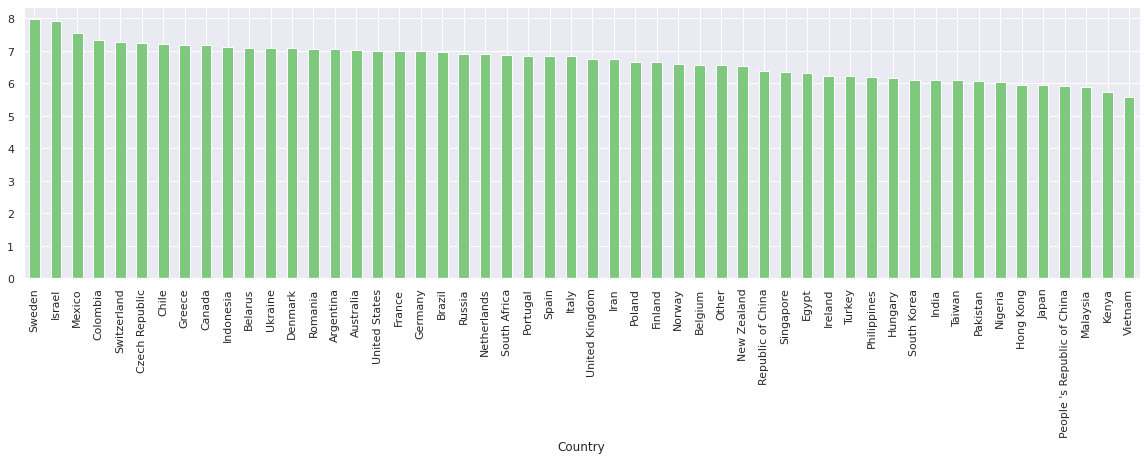

In [ ]:
import matplotlib.pyplot as plt

df_plot = df.groupby(['Country'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(20,5),colormap="Accent")

Sweden has the most satisfied employees.

###**Distribution of Job Satisfaction wrt to Current Jobs**

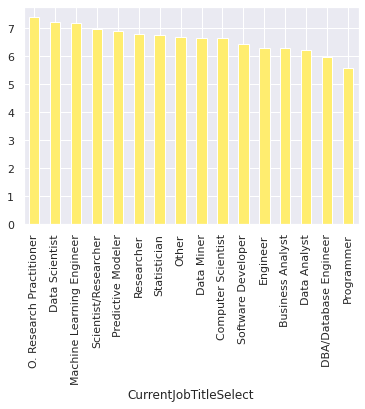

In [ ]:

df2=df.copy()

map = {'Software Developer/Software Engineer':"Software Developer",'Operations Research Practitioner':"O. Research Practitioner"}

df2['CurrentJobTitleSelect'] = df2['CurrentJobTitleSelect'].replace(map)
df_plot = df2.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(6,4),colormap="Set3_r")

The figure above shows the correlation between the job satisfaction and the current job titles of employees.
Research practitioners and data scientists are observed to be the most satisfied employees whereas programmers are the least satisfied with their jobs.


###**Distribution of Job Satisfaction wrt Language Recommendation**

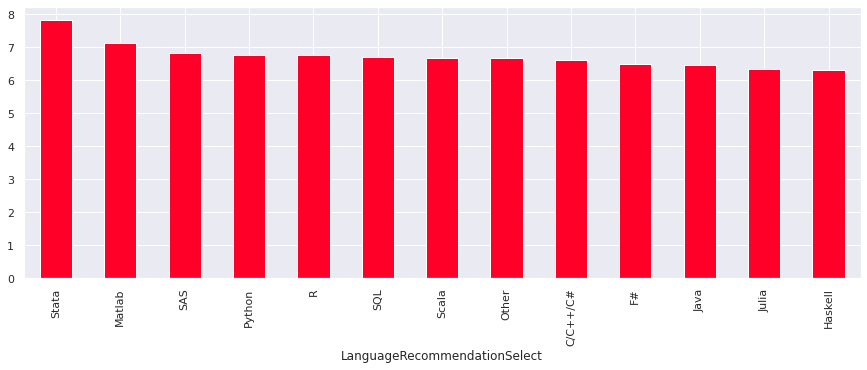

In [ ]:
df_plot = df.groupby(['LanguageRecommendationSelect'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(15,5),colormap="gist_rainbow")

Stata users are the most satisfied employees.

###**Distribution of Employer Industry wrt Job Satisfaction**

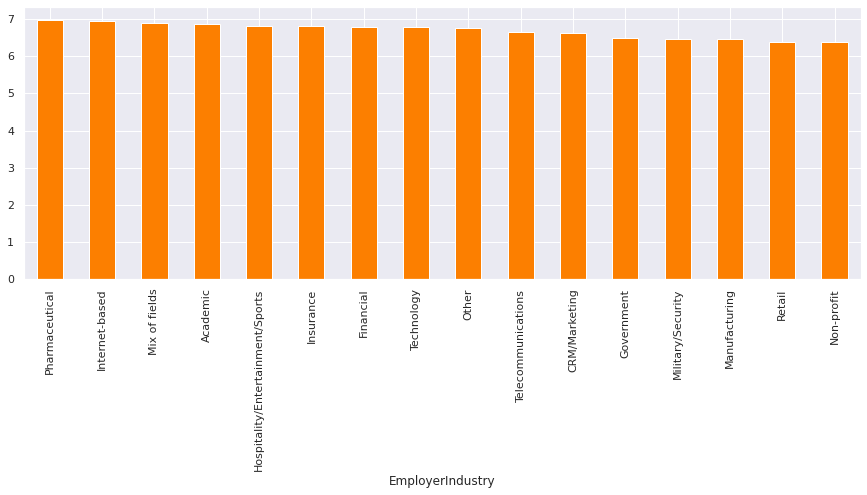

In [ ]:
df_plot = df.groupby(['EmployerIndustry'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(15,5),colormap="Wistia_r")

###**Distribution of Job Satisfaction wrt Remotework**

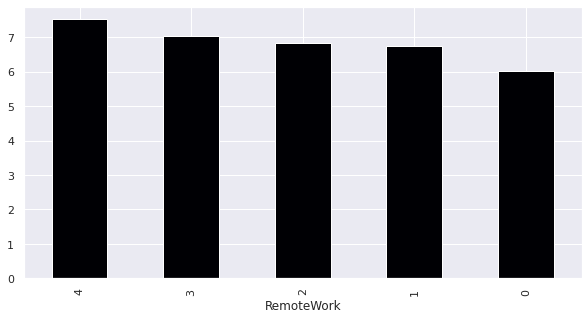

In [ ]:
import matplotlib.pyplot as plt

df_plot = df.groupby(['RemoteWork'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(10,5),colormap="magma")

  It can be concluded that employees who work remotely have a higher job satisfaction than those who have not this kind of flexibility.
  As employees with higher job satisfaction are able to perform better at work, it is more valuable and productive for the companies. 
  Hence, they may consider to alter the job requirements and allow employees to work remotely in order to increase the job performance quality.


###**Relation Between Gender and Country to Job Satisfaction**

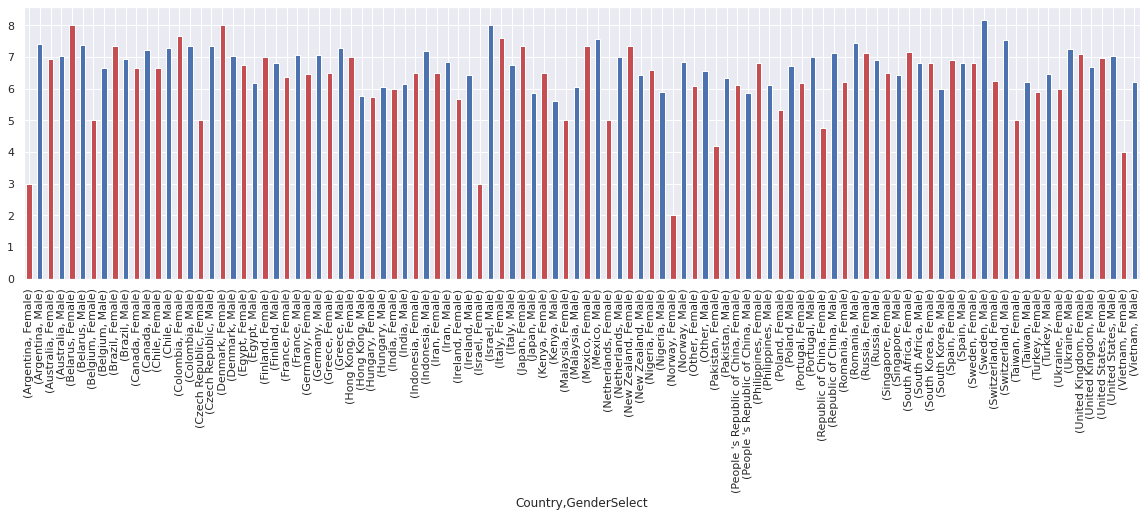

In [ ]:
import matplotlib.pyplot as plt

df_twogender = df[(df['GenderSelect'] == 'Male') | (df['GenderSelect'] == 'Female')]

df_plot = df_twogender.groupby(['Country','GenderSelect'])['JobSatisfaction'].mean()

mycolor = ['r','b']
df_plot.plot(kind='bar',figsize=(20,5), color=mycolor)

##**Relation Between Compensation Scores and ML Methods**

###Distribution of ML Methods Selected to Learn

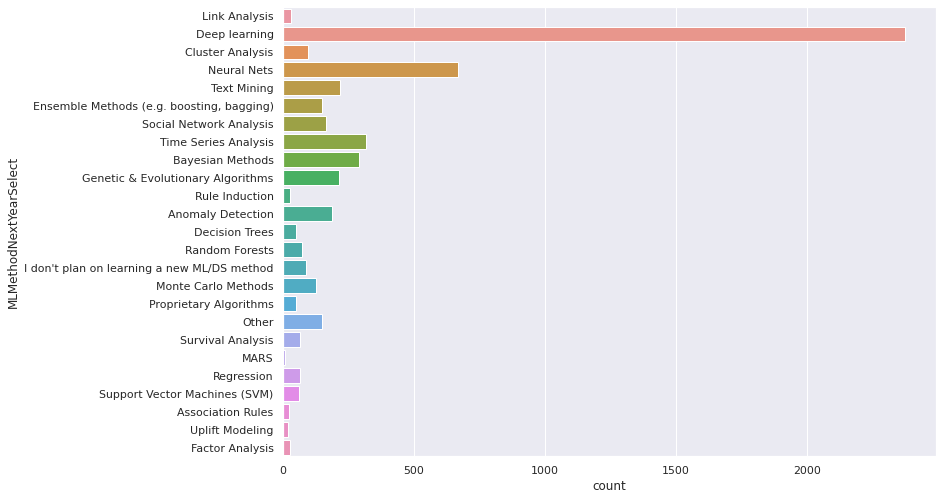

In [ ]:
import seaborn as sn
ax = sn.countplot(y="MLMethodNextYearSelect",data=df)
sn.set(rc={'figure.figsize':(11.7,8.27)})

Deep learning is the most preferred ML method to be learn next year. Second most preferred is Neural Nets.

###Distribution Of Compensation Scores

<Figure size 720x576 with 0 Axes>

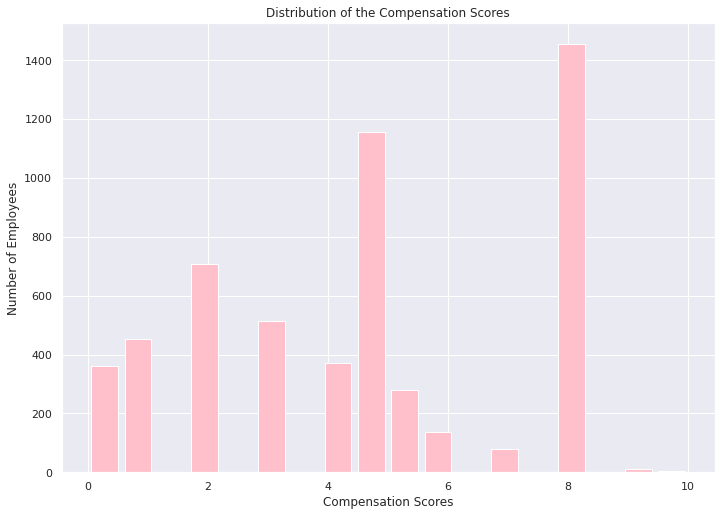

<Figure size 720x576 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['CompensationScore'],bins=18,rwidth= 0.8,align='mid',color='pink')

plt.xlabel("Compensation Scores")
plt.ylabel("Number of Employees")
plt.title("Distribution of the Compensation Scores")
plt.figure(figsize=(10,8))


Compensation score shows the value of an employee. Companies would want to work with highest scores which is 10 but lots of employees got a point of 8.

###Distribution of the ML Methods by Compensation Scores

<Figure size 864x720 with 0 Axes>

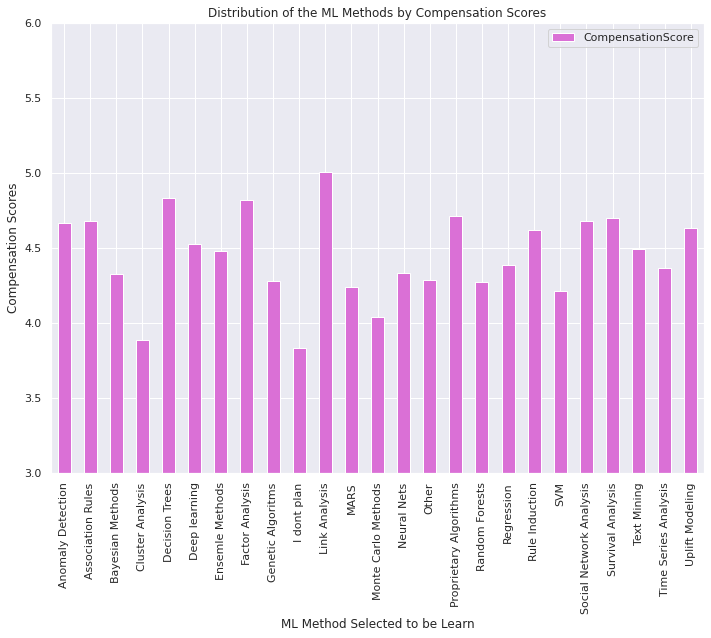

<Figure size 864x720 with 0 Axes>

In [ ]:


df_copy2=df_dropped.copy()
TitleFit_map = {'Genetic & Evolutionary Algorithms':'Genetic Algoritms', "I don't plan on learning a new ML/DS method": 'I dont plan', "Ensemble Methods (e.g. boosting, bagging)": "Ensemle Methods","Support Vector Machines (SVM)": "SVM"}
df_copy2['MLMethodNextYearSelect'] = df_copy2['MLMethodNextYearSelect'].replace(TitleFit_map)

b=df_copy2.groupby(['MLMethodNextYearSelect'])['CompensationScore'].mean()

df_b = pd.DataFrame(b) 
df_b.plot(kind='bar', color='orchid')


plt.xlabel("ML Method Selected to be Learn")
plt.ylabel("Compensation Scores")
plt.title("Distribution of the ML Methods by Compensation Scores")
plt.ylim(3,6)
plt.figure(figsize=(12,10))



Even though, employees most selected ML method for next year was deep learning, the highest compensation score owners suggestion is link analysis.

###Analysis of Top 10 Employees who Got Highest Compensation Score

(0.0, 7.0)

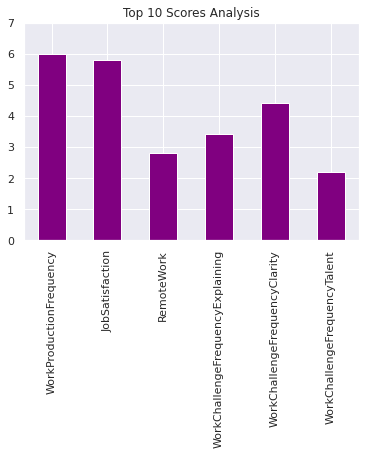

In [ ]:
import matplotlib.pyplot as plt


df_top5scores=df_dropped.nlargest(10, ['CompensationScore'])
df_top5scores["RemoteWork"]= df_top5scores["RemoteWork"]*2
df_top5scores["WorkChallengeFrequencyExplaining"]= df_top5scores["WorkChallengeFrequencyExplaining"]*2
df_top5scores["WorkChallengeFrequencyClarity"]= df_top5scores["WorkChallengeFrequencyClarity"]*2
df_top5scores["WorkProductionFrequency"]= df_top5scores["WorkProductionFrequency"]*2

df_top5scores["WorkProductionFrequency"]= df_top5scores["WorkProductionFrequency"]*2
df_top5jobs2 = df_top5scores.agg({'WorkProductionFrequency':'mean','JobSatisfaction':'mean' ,'RemoteWork':'mean','WorkChallengeFrequencyExplaining':'mean', 'WorkChallengeFrequencyClarity':'mean', 'WorkChallengeFrequencyTalent': 'mean'})

ax = df_top5jobs2[['WorkProductionFrequency','JobSatisfaction','RemoteWork', 'WorkChallengeFrequencyExplaining', 'WorkChallengeFrequencyClarity', 'WorkChallengeFrequencyTalent' ]].plot.bar(figsize=(6,4),color='purple', title="Top 10 Scores Analysis")
#plt.show()

axes = plt.gca()

axes.set_ylim([0,7])



The most valuable employees are not usually working remotely. 
Their work production level and job satisfaction level is really close to each other.These employees will contribute to the company as their models are used in production. So, companies should try to focus on their satisfaction by decreasing their work challenge factors: mostly clarity issues.

##**Job Title Analysis**

###Current Job Titles

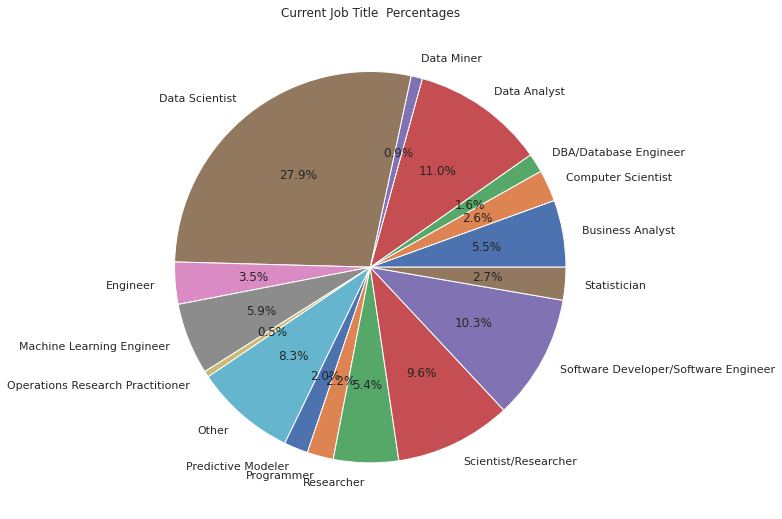

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(9,9)) 
ax = df.groupby(by = "CurrentJobTitleSelect").size().plot(ax = axes, kind= "pie", title = "Current Job Title  Percentages", autopct='%1.1f%%', label="") 
plt.show()

With %27.9 percentage, data scientist is the most selected job title.

###**Relation Between Recommended Languages by Job Title**

The relation between the recommended languages and the job titles are investigated.

<Figure size 720x576 with 0 Axes>

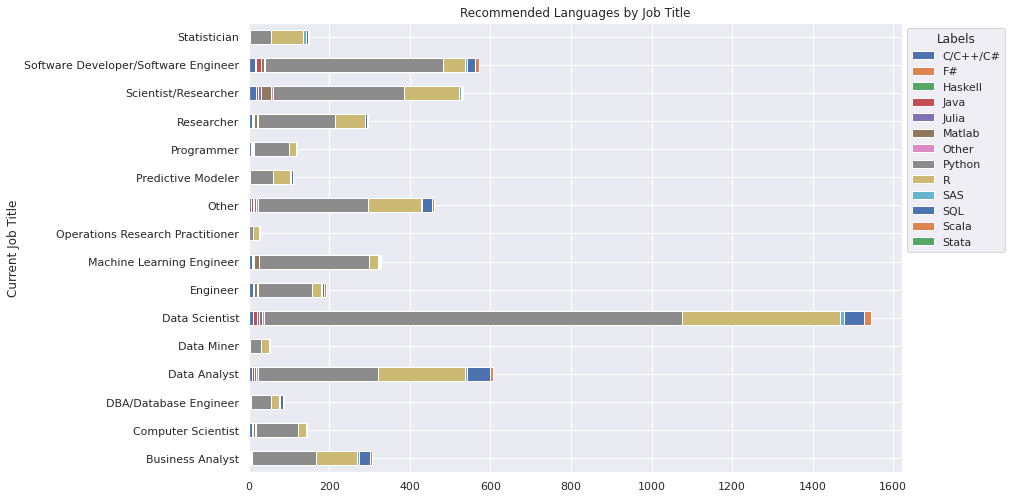

<Figure size 720x576 with 0 Axes>

In [ ]:
df2 = df_dropped.groupby(['CurrentJobTitleSelect', 'LanguageRecommendationSelect'])['Age'].count().unstack('LanguageRecommendationSelect').fillna(0).reset_index()

ax = df2.plot(x = 'CurrentJobTitleSelect', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True)

ax.set_ylabel('Current Job Title')
ax.set_title('Recommended Languages by Job Title')
plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed

plt.figure(figsize=(10,8))


In this figure, it is seen that which employers recommend which languages. This figure provides information about the preffered languages for different job titles. Data scientist mostly prefer Python and R, but SQL is also used. For example, it is clear that the most recommended language within different job titles is Python. The second most recommended language is R. 
If companies want to hire a operations research practitioner, data miner or database engineer, they dont have lots of options regarding the small numbers.

###**Relation Between Selected Jobs and Their Votes for Usefulness to Different Platforms** 

(1.0, 2.0)

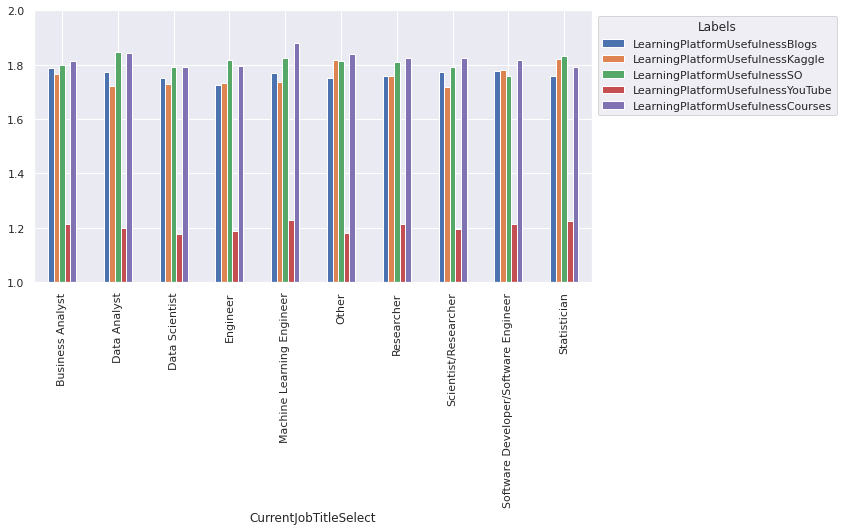

In [ ]:
import matplotlib.pyplot as plt
top10jobs = df_dropped['CurrentJobTitleSelect'].value_counts()[:10].index.tolist()

df_top10jobs = df_dropped[df_dropped['CurrentJobTitleSelect'].isin(top10jobs)]

df_top10jobs2 = df_top10jobs.groupby(['CurrentJobTitleSelect']).agg({'LearningPlatformUsefulnessBlogs':'mean','LearningPlatformUsefulnessKaggle':'mean' ,'LearningPlatformUsefulnessSO':'mean','LearningPlatformUsefulnessYouTube':'mean', 'LearningPlatformUsefulnessCourses':'mean'})

ax = df_top10jobs2[['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessYouTube', 'LearningPlatformUsefulnessCourses' ]].plot.bar(figsize=(10,5))
plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='upper left')
axes = plt.gca()
axes.set_ylim([1,2])


This figure questions the usefulness of different learning platforms according to job titles. It is observed that Youtube has the lowest usefulness score among other platforms. This means, an online course through the Youtube can make a huge difference for companies to spread their names because there is an suitable gap in this field. If the goal of the company is to reach out a specific job title, it can use the highest preferred platform.

##**Work Methods Frequency Analysis**

###Relation Between The Industry and the Use of Work Methods Frequency

(1.5, 3.0)

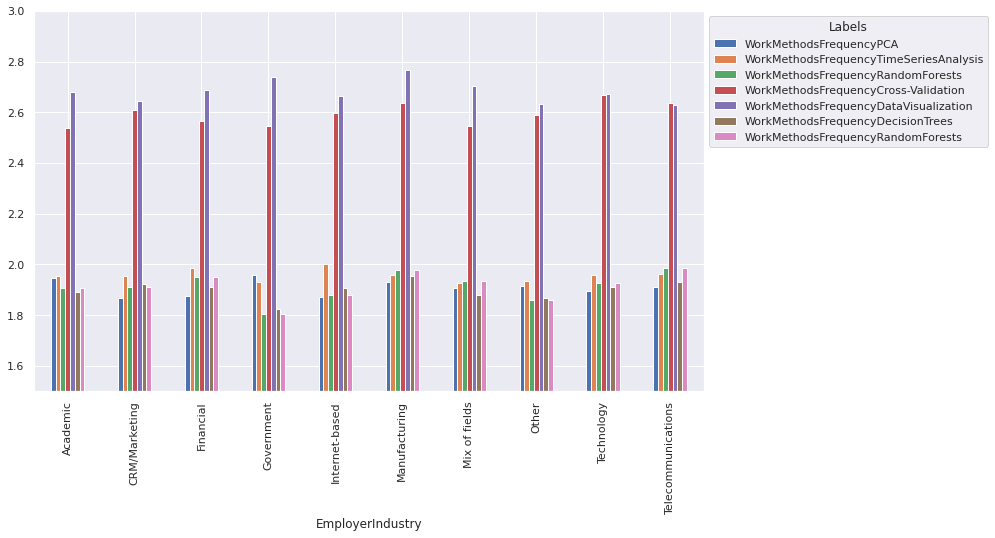

In [ ]:

import matplotlib.pyplot as plt
top10indust = df_dropped['EmployerIndustry'].value_counts()[:10].index.tolist()

df_top10indust = df_dropped[df_dropped['EmployerIndustry'].isin(top10indust)]

df_top10indust2 = df_top10indust.groupby(['EmployerIndustry']).agg({'WorkMethodsFrequencyPCA':'mean','WorkMethodsFrequencyTimeSeriesAnalysis':'mean' ,'WorkMethodsFrequencyRandomForests':'mean','WorkMethodsFrequencyCross-Validation':'mean', 'WorkMethodsFrequencyDataVisualization':'mean', 'WorkMethodsFrequencyDecisionTrees':'mean', 'WorkMethodsFrequencyRandomForests':'mean'})

ax = df_top10indust2[['WorkMethodsFrequencyPCA','WorkMethodsFrequencyTimeSeriesAnalysis','WorkMethodsFrequencyRandomForests', 'WorkMethodsFrequencyCross-Validation', 'WorkMethodsFrequencyDataVisualization','WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyRandomForests' ]].plot.bar(figsize=(12,7))
#plt.show()
plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='upper left')
axes = plt.gca()

axes.set_ylim([1.5,3])
#fig = plt.figure()

In the figure above, distinct work methods’ frequency can be analyzed for each industry.
Almost for all industries, the employees use data visualization most of the time. It is followed by the cross-validation that is the second most preferred method.
Even though the frequency of each method interchange in distinct industries, in general, the random forest and decision trees are the least used methods.
For instance, technology industry regularly use data visualization and cross-validation and use PCA very rarely. 


###Relation Between Language Recommendation and Use of Work Methods Frequency

(1.5, 3.0)

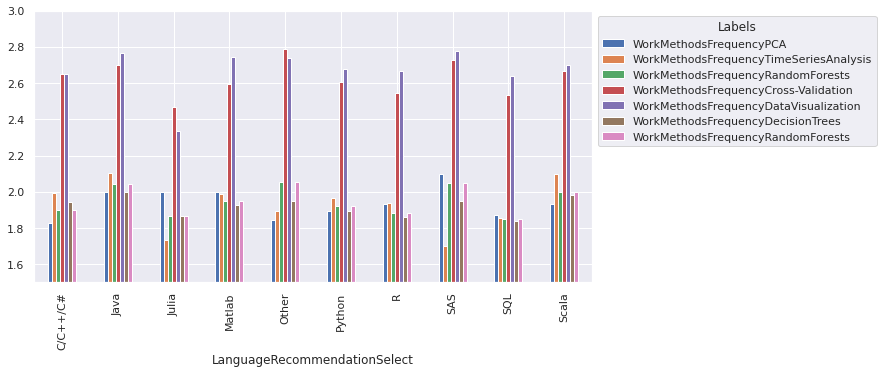

In [ ]:
import matplotlib.pyplot as plt
top10lang = df_dropped['LanguageRecommendationSelect'].value_counts()[:10].index.tolist()

df_top10lang = df_dropped[df_dropped['LanguageRecommendationSelect'].isin(top10lang)]

df_top10lang2 = df_top10lang.groupby(['LanguageRecommendationSelect']).agg({'WorkMethodsFrequencyPCA':'mean','WorkMethodsFrequencyTimeSeriesAnalysis':'mean' ,'WorkMethodsFrequencyRandomForests':'mean','WorkMethodsFrequencyCross-Validation':'mean', 'WorkMethodsFrequencyDataVisualization':'mean', 'WorkMethodsFrequencyDecisionTrees':'mean', 'WorkMethodsFrequencyRandomForests':'mean'})

ax = df_top10lang2[['WorkMethodsFrequencyPCA','WorkMethodsFrequencyTimeSeriesAnalysis','WorkMethodsFrequencyRandomForests', 'WorkMethodsFrequencyCross-Validation', 'WorkMethodsFrequencyDataVisualization','WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyRandomForests' ]].plot.bar(figsize=(10,5))
#plt.show()
plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='upper left')
axes = plt.gca()

axes.set_ylim([1.5,3])
#fig = plt.figure()

Furthermore, the intercourse between these methods and the language recommendations made  by employees can be analyzed.
Companies may make use of which methods are frequently applied in which languages by employees. By analyzing this, they can investigate the applicants’ language preference  whether they use the proper corresponding work methods.

For example, in Java and Python languages, data visualization is the most operated method that is followed by cross-validation. Time series analysis is the least used method in both languages.


###Relation Between Job Satisfaction and Work Methods Frequency

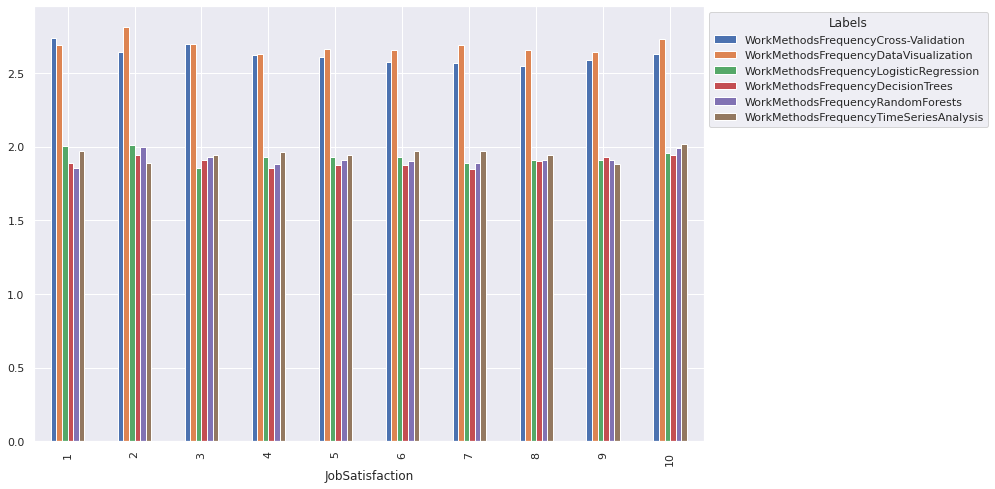

In [ ]:
import matplotlib.pyplot as plt

df_js = df_dropped.groupby(['JobSatisfaction']).agg({'WorkMethodsFrequencyCross-Validation':'mean','WorkMethodsFrequencyDataVisualization':'mean' ,'WorkMethodsFrequencyLogisticRegression':'mean',"WorkMethodsFrequencyDecisionTrees":"mean","WorkMethodsFrequencyRandomForests":"mean", "WorkMethodsFrequencyTimeSeriesAnalysis": "mean"})

ax = df_js[['WorkMethodsFrequencyCross-Validation','WorkMethodsFrequencyDataVisualization','WorkMethodsFrequencyLogisticRegression', "WorkMethodsFrequencyDecisionTrees", "WorkMethodsFrequencyRandomForests","WorkMethodsFrequencyTimeSeriesAnalysis" ]].plot.bar(figsize=(12,8))
#plt.show()
plt.legend(title='Labels', bbox_to_anchor=(1.0,1), loc='upper left')
axes = plt.gca()



In this figure, the relation between work methods’ frequency and job satisfaction can be observed. The most frequently used methods are data visualization and cross validation.
Companies are able to observe whether the frequency of work methods has an influence on the job satisfaction of employees and make a better decision over hiring an employee in terms of the effect of their method handling.


##**Educational Analysis**

###**Distribution of the Selected Majors by Employees**

Text(0.5, 1.0, 'Distribution of the Selected Majors by Employees')

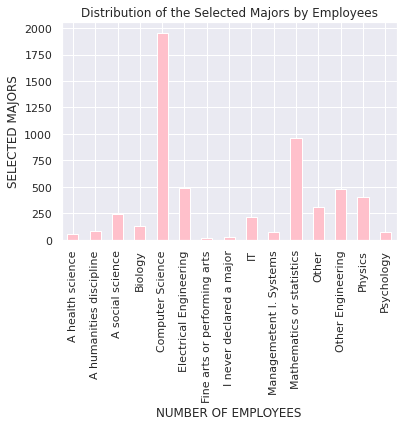

In [ ]:

df8=df_dropped.copy()
TitleFit_map = {'Information technology, networking, or system administration':'IT', "Engineering (non-computer focused)": 'Other Engineering', "Management information systems": "Managemetent I. Systems"}
df8['MajorSelect'] = df8['MajorSelect'].replace(TitleFit_map)
count_dist=df8.groupby(by="MajorSelect").count()
count_dist['Age'].plot.bar(figsize=(6,4), color='pink')

plt.xlabel("NUMBER OF EMPLOYEES")
plt.ylabel("SELECTED MAJORS")
plt.title("Distribution of the Selected Majors by Employees")




It can be stated that number of employees who majored in computer science are the most by far, second most major selection is mathematics/statistics. Fine arts major is the least preferred major among all applicants.

###**Relation Between Major Selected and Job Satisfaction**

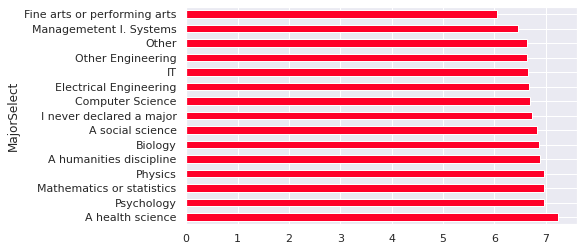

In [ ]:
df_plot = df8.groupby(['MajorSelect'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='barh',figsize=(7,4),colormap="gist_rainbow")

Interestingly, it is observed that health science majored employees have the highest job satisfaction and employees who majored in fine arts are the least satisfied with jobs. However, previously it is analyzed that employees whose current job is research practitioner or data scientists have the highest fulfillment.


###**Relation Between Formal Education and Production Frequency**

Text(0.5, 1.0, 'Production Frequency by Education Type')

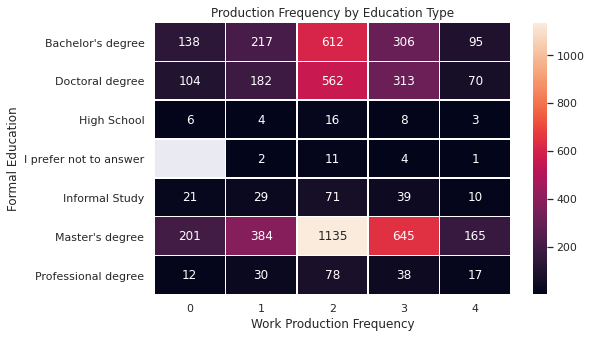

In [ ]:
import seaborn as sns
sns.set_theme()
TitleFit_map = {"Some college/university study without earning a bachelor's degree":'Informal Study', "I did not complete any formal education past high school": 'High School'}
df8['FormalEducation'] = df8['FormalEducation'].replace(TitleFit_map)

df2 = df8.groupby(['FormalEducation', 'WorkProductionFrequency'])['Age'].count().fillna(0).reset_index()


df3 = df2.pivot("FormalEducation", "WorkProductionFrequency", "Age")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df3, annot=True,fmt='g', linewidths=.5, ax=ax)
plt.xlabel("Work Production Frequency")
plt.ylabel("Formal Education")
plt.title('Production Frequency by Education Type')



The figure above investigates whether there exists a relation between employees’ education level and the frequency of the models that are built and put into production. It is seen that employees with master’s and bachelor’s degree have the highest model production frequency which companies always want.

###**Relation Between Major Selection and Compensation Score**

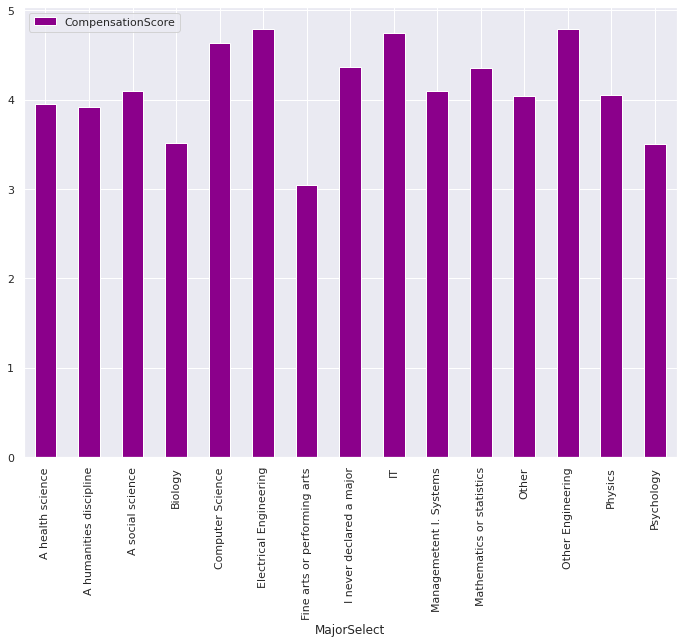

In [ ]:
b=df8.groupby(['MajorSelect'])['CompensationScore'].mean()
df_b = pd.DataFrame(b) 
df_b.plot(kind='bar', color='darkmagenta')


  Employees who majored in general engineering, electrical engineering and information technologies have the highest compensation score meaning the value of an employee, whereas fine arts majored employees have the lowest compensation score.

#Job Satisfaction Prediction#

## **Categorical Attributes to One Hot Encoding**

In [ ]:
"""
df_dropped = df_dropped.drop(['Country'], axis = 1)
df_dropped = df_dropped.drop(['GenderSelect'], axis = 1)
df_dropped = df_dropped.drop(['EmploymentStatus'], axis = 1)
df_dropped = df_dropped.drop(['CurrentJobTitleSelect'], axis = 1)
df_dropped = df_dropped.drop(['CurrentEmployerType'], axis = 1)
df_dropped = df_dropped.drop(['MLToolNextYearSelect'], axis = 1)
df_dropped = df_dropped.drop(['MLMethodNextYearSelect'], axis = 1)

df_dropped = df_dropped.drop(['LanguageRecommendationSelect'], axis = 1)
df_dropped = df_dropped.drop(['DataScienceIdentitySelect'], axis = 1)
df_dropped = df_dropped.drop(['FormalEducation'], axis = 1)
df_dropped = df_dropped.drop(['MajorSelect'], axis = 1)

df_dropped = df_dropped.drop(['EmployerIndustry'], axis = 1)
df_dropped = df_dropped.drop(['WorkInternalVsExternalTools'], axis = 1)
df_dropped = df_dropped.drop(['WorkMLTeamSeatSelect'], axis = 1)
"""

"\ndf_dropped = df_dropped.drop(['Country'], axis = 1)\ndf_dropped = df_dropped.drop(['GenderSelect'], axis = 1)\ndf_dropped = df_dropped.drop(['EmploymentStatus'], axis = 1)\ndf_dropped = df_dropped.drop(['CurrentJobTitleSelect'], axis = 1)\ndf_dropped = df_dropped.drop(['CurrentEmployerType'], axis = 1)\ndf_dropped = df_dropped.drop(['MLToolNextYearSelect'], axis = 1)\ndf_dropped = df_dropped.drop(['MLMethodNextYearSelect'], axis = 1)\n\ndf_dropped = df_dropped.drop(['LanguageRecommendationSelect'], axis = 1)\ndf_dropped = df_dropped.drop(['DataScienceIdentitySelect'], axis = 1)\ndf_dropped = df_dropped.drop(['FormalEducation'], axis = 1)\ndf_dropped = df_dropped.drop(['MajorSelect'], axis = 1)\n\ndf_dropped = df_dropped.drop(['EmployerIndustry'], axis = 1)\ndf_dropped = df_dropped.drop(['WorkInternalVsExternalTools'], axis = 1)\ndf_dropped = df_dropped.drop(['WorkMLTeamSeatSelect'], axis = 1)\n"

In [ ]:
"""
test_df = test_df.drop(['Country'], axis = 1)
test_df = test_df.drop(['GenderSelect'], axis = 1)
test_df = test_df.drop(['EmploymentStatus'], axis = 1)
test_df = test_df.drop(['CurrentJobTitleSelect'], axis = 1)
test_df = test_df.drop(['CurrentEmployerType'], axis = 1)
test_df = test_df.drop(['MLToolNextYearSelect'], axis = 1)
test_df = test_df.drop(['MLMethodNextYearSelect'], axis = 1)

test_df = test_df.drop(['LanguageRecommendationSelect'], axis = 1)
test_df = test_df.drop(['DataScienceIdentitySelect'], axis = 1)
test_df = test_df.drop(['FormalEducation'], axis = 1)
test_df = test_df.drop(['MajorSelect'], axis = 1)

test_df = test_df.drop(['EmployerIndustry'], axis = 1)
test_df = test_df.drop(['WorkInternalVsExternalTools'], axis = 1)
test_df = test_df.drop(['WorkMLTeamSeatSelect'], axis = 1)
"""

"\ntest_df = test_df.drop(['Country'], axis = 1)\ntest_df = test_df.drop(['GenderSelect'], axis = 1)\ntest_df = test_df.drop(['EmploymentStatus'], axis = 1)\ntest_df = test_df.drop(['CurrentJobTitleSelect'], axis = 1)\ntest_df = test_df.drop(['CurrentEmployerType'], axis = 1)\ntest_df = test_df.drop(['MLToolNextYearSelect'], axis = 1)\ntest_df = test_df.drop(['MLMethodNextYearSelect'], axis = 1)\n\ntest_df = test_df.drop(['LanguageRecommendationSelect'], axis = 1)\ntest_df = test_df.drop(['DataScienceIdentitySelect'], axis = 1)\ntest_df = test_df.drop(['FormalEducation'], axis = 1)\ntest_df = test_df.drop(['MajorSelect'], axis = 1)\n\ntest_df = test_df.drop(['EmployerIndustry'], axis = 1)\ntest_df = test_df.drop(['WorkInternalVsExternalTools'], axis = 1)\ntest_df = test_df.drop(['WorkMLTeamSeatSelect'], axis = 1)\n"

In [ ]:
df_dropped = df_dropped.drop(columns='Country')
df_dropped = df_dropped.drop(columns='LanguageRecommendationSelect')


In [ ]:
test_df = test_df.drop(columns='Country')
test_df = test_df.drop(columns='LanguageRecommendationSelect')

In [ ]:
"""
dummies_plans = pd.get_dummies(df_dropped['Country'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='Country')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='Country')
"""
dummies_plans = pd.get_dummies(df_dropped['GenderSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='GenderSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='GenderSelect')

dummies_plans = pd.get_dummies(df_dropped['EmploymentStatus'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='EmploymentStatus')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='EmploymentStatus')

dummies_plans = pd.get_dummies(df_dropped['CurrentJobTitleSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='CurrentJobTitleSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='CurrentJobTitleSelect')

dummies_plans = pd.get_dummies(df_dropped['MLToolNextYearSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='MLToolNextYearSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='MLToolNextYearSelect')

dummies_plans = pd.get_dummies(df_dropped['MLMethodNextYearSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='MLMethodNextYearSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='MLMethodNextYearSelect')
"""
dummies_plans = pd.get_dummies(df_dropped['LanguageRecommendationSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='LanguageRecommendationSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='LanguageRecommendationSelect')
"""
dummies_plans = pd.get_dummies(df_dropped['FormalEducation'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='FormalEducation')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='FormalEducation')

dummies_plans = pd.get_dummies(df_dropped['MajorSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='MajorSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='MajorSelect')

dummies_plans = pd.get_dummies(df_dropped['EmployerIndustry'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='EmployerIndustry')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='EmployerIndustry')

dummies_plans = pd.get_dummies(df_dropped['WorkMLTeamSeatSelect'])
df_dropped = pd.merge(df_dropped,dummies_plans,left_index=True,right_index=True)
df_dropped = df_dropped.drop(columns='WorkMLTeamSeatSelect')
test_df = pd.merge(test_df,dummies_plans,left_index=True,right_index=True)
test_df = test_df.drop(columns='WorkMLTeamSeatSelect')

In [ ]:
df_dropped

,Age,TitleFit,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,Tenure,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,RemoteWork,JobSatisfaction,Business Analyst_x,Computer Scientist_x,DBA/Database Engineer_x,Data Analyst_x,...,I prefer not to answer,Master's degree,Professional degree,Some college/university study without earning a bachelor's degree,A health science,A humanities discipline,A social science,Biology,Computer Science,Electrical Engineering,Engineering (non-computer focused),Fine arts or performing arts,I never declared a major,"Information technology, networking, or system administration",Management information systems,Mathematics or statistics,Other_x,Physics,Psychology,Academic,CRM/Marketing,Financial,Government,Hospitality/Entertainment/Sports,Insurance,Internet-based,Manufacturing,Military/Security,Mix of fields,Non-profit,Other_y,Pharmaceutical,Retail,Technology,Telecommunications,Business Department,Central Insights Team,IT Department,Other,Standalone Team
0,28.0,1,2,2,2,2,2,2,0,1,3,7.0,4,2,3,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,8.000000,4,2,2,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,26.0,0,1,2,2,2,2,2,1,0,2,5.0,1,1,2,3,1,3,2,2,2,2,2,0,2,2,3,2,2,2,2,4.445003,6,3,2,7,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,34.0,1,2,2,1,2,2,1,1,1,4,5.0,1,1,2,3,2,2,2,2,2,1,2,1,2,1,3,2,1,2,3,2.000000,2,3,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,33.0,1,2,2,2,2,1,2,1,0,5,6.0,2,1,3,3,3,2,2,1,2,2,2,1,2,2,3,2,2,0,0,2.000000,5,2,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,35.0,1,2,2,1,2,2,2,1,0,5,7.0,2,3,3,3,3,3,2,1,3,1,2,2,2,2,3,2,2,2,1,8.000000,6,4,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,48.0,1,2,2,2,2,2,2,1,2,5,2.0,4,3,3,3,3,3,3,3,3,3,3,3,1,2,3,2,2,2,2,1.000000,4,4,2,8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5525,27.0,1,1,1,2,2,2,2,1,2,3,3.0,3,3,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,2,1,1.000000,1,3,1,8,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5526,30.0,2,1,2,2,2,2,2,2,1,3,3.0,3,2,3,3,3,2,3,1,1,2,2,2,1,2,3,2,1,2,3,2.000000,2,2,2,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5527,29.0,1,2,2,2,2,2,2,1,2,4,2.0,3,1,3,2,1,3,2,1,2,2,1,1,2,2,1,2,2,2,2,6.000000,4,3,1,9,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from scipy import stats
df_dropped[(np.abs(stats.zscore(df_dropped)) < 4).all(axis=1)]

,Age,TitleFit,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,Tenure,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,RemoteWork,JobSatisfaction,Business Analyst_x,Computer Scientist_x,DBA/Database Engineer_x,Data Analyst_x,...,I prefer not to answer,Master's degree,Professional degree,Some college/university study without earning a bachelor's degree,A health science,A humanities discipline,A social science,Biology,Computer Science,Electrical Engineering,Engineering (non-computer focused),Fine arts or performing arts,I never declared a major,"Information technology, networking, or system administration",Management information systems,Mathematics or statistics,Other_x,Physics,Psychology,Academic,CRM/Marketing,Financial,Government,Hospitality/Entertainment/Sports,Insurance,Internet-based,Manufacturing,Military/Security,Mix of fields,Non-profit,Other_y,Pharmaceutical,Retail,Technology,Telecommunications,Business Department,Central Insights Team,IT Department,Other,Standalone Team
5,26.000000,1,2,2,2,2,2,2,1,2,2,0.0,3,3,2,3,3,3,1,3,2,2,3,2,2,2,3,2,2,2,2,1.000000,4,4,3,9,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,34.000000,2,1,2,1,2,2,1,1,2,4,1.0,0,3,3,3,1,2,1,2,2,2,2,2,2,2,1,1,2,3,2,2.000000,6,3,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,24.000000,2,2,1,2,1,2,2,1,1,3,4.0,0,3,1,3,3,3,2,2,3,2,2,2,2,2,3,2,2,2,2,9.000000,6,3,2,9,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,45.000000,1,1,2,2,2,1,2,2,2,2,7.0,3,3,2,3,3,3,3,3,3,3,3,3,2,2,3,2,2,2,2,4.445003,5,4,2,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
27,34.461637,1,2,2,2,2,2,2,1,2,3,1.0,3,3,3,3,2,3,2,2,2,2,2,2,1,1,3,2,2,2,2,4.445003,5,3,2,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,26.000000,1,2,2,1,2,1,2,2,2,3,7.0,2,3,3,1,3,3,2,2,3,2,1,2,2,2,2,1,2,2,2,8.000000,4,4,2,7,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5509,33.000000,1,2,2,1,2,2,2,1,2,4,2.0,3,3,3,1,3,3,2,3,2,2,1,2,2,2,3,3,2,3,2,6.000000,3,3,2,8,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5510,53.000000,1,2,2,2,1,2,2,1,2,4,4.0,2,1,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,2,2,8.000000,6,4,2,10,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5518,39.000000,1,2,2,2,2,2,2,1,0,3,1.0,1,3,3,3,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2.000000,6,3,2,7,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#drop outliers
df_dropped = df_dropped.drop([df_dropped.index[195] , df_dropped.index[290],df_dropped.index[447] , df_dropped.index[657],df_dropped.index[795] , df_dropped.index[945],df_dropped.index[2129] , df_dropped.index[2401],df_dropped.index[2895] , df_dropped.index[2911],df_dropped.index[3158] , df_dropped.index[3552], df_dropped.index[3583], df_dropped.index[3708], df_dropped.index[3897], df_dropped.index[3946], df_dropped.index[4042], df_dropped.index[4316], df_dropped.index[5105], df_dropped.index[5171]])


In [ ]:
df_dropped = df_dropped.iloc[:, : 100]
test_df = test_df.iloc[:, : 99]

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

y_train = df_dropped['JobSatisfaction']
x_train = df_dropped
x_train.drop('JobSatisfaction', axis=1, inplace=True)


#x_train, y_train, = shuffle(x_train, y_train, random_state=25)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1/5, random_state=42)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.intercept_)

5.917116900593451


In [ ]:
feature_cols = df_dropped.columns
zip(feature_cols,reg.coef_)

In [ ]:
reg.coef_

array([ 1.83119722e-02,  5.20061286e-01,  6.77793618e-02, -6.60968292e-02,
        3.10847263e-02,  1.11673865e-01, -1.11727965e-01,  7.50266067e-02,
       -9.08614905e-02,  1.44669873e-01, -1.90658051e-02, -1.21194380e-02,
        1.80661974e-01,  7.32663276e-02,  2.47947672e-02, -2.95774791e-03,
       -6.73034440e-02, -6.45775794e-02,  4.98715141e-02, -6.53339847e-02,
       -6.18823168e-03, -2.43701401e-03,  1.10469087e-01,  5.31523951e-02,
       -3.19381694e-01, -1.80055134e-01, -5.92566458e-02,  2.85464459e-02,
       -2.60602641e-01, -1.68046733e-01, -1.59972798e-01, -3.42416970e-03,
        9.46314470e-02,  8.62404685e-02,  2.17218726e-01,  7.20630032e-02,
       -5.22040374e-02, -1.50999794e-01, -1.07905556e-01, -1.67800831e-02,
        1.19866727e-02, -1.12484593e-01,  2.27854086e-01,  1.28270156e-01,
       -1.08678489e-01,  1.60813566e-01,  2.64428676e-01, -1.35832120e-01,
        1.23484670e-01, -5.53934216e-02, -1.46083041e-01, -5.48061325e-02,
        1.47556485e-02, -

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5604377232730715
Mean Squared Error: 3.972871949680746
Root Mean Squared Error: 1.9932064493375357


In [ ]:
#y_pred = regressor.predict(test_df)

In [ ]:
dfx = pd.DataFrame(y_pred)

In [ ]:
dfx

,0
0,8.197454
1,6.411089
2,6.969437
3,6.538353
4,8.137379
...,...
995,7.556207
996,6.570143
997,6.447354
998,7.510556


In [ ]:
#convert to excel

from pandas import ExcelWriter

writer = ExcelWriter('results.xlsx')
dfx.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
df_dropped.head()

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,...,Survival Analysis,Time Series,Unsupervised Learning,Bayesian Techniques,Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Ensemble Methods,Evolutionary Approaches,Gradient Boosting,Hidden Markov Models HMMs,Logistic Regression,Markov Logic Networks,Neural Networks - CNNs,Neural Networks - GANs,Neural Networks - RNNs,Other (please specify; separate by semi-colon),Support Vector Machines (SVMs),Bayesian Techniques,CNNs,Decision Trees,Ensemble Methods,Evolutionary Approaches,GANs,Gradient Boosted Machines,HMMs,Markov Logic Networks,Neural Networks,Other,RNNs,Random Forests,Regression/Logistic Regression,SVMs,Employed by a company that doesn't perform advanced analytics,Employed by a company that performs advanced analytics,Employed by college or university,Employed by company that makes advanced analytic software,Employed by government,Employed by non-profit or NGO,Employed by professional services/consulting firm,Self-employed
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,1,Python,Link Analysis,SAS,2,2,2,2,2,2,0,1,Bachelor's degree,"Information technology, networking, or system ...",3,Technology,7.0,4,2,3,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,0,Python,Deep learning,Python,1,2,2,2,2,2,1,0,Master's degree,Computer Science,2,Government,5.0,1,1,2,3,1,3,2,2,2,2,2,0,2,2,3,2,2,2,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,Female,United States,34.0,Employed full-time,Data Analyst,1,TensorFlow,Deep learning,Python,2,2,1,2,2,1,1,1,Doctoral degree,Mathematics or statistics,4,Government,5.0,1,1,2,3,2,2,2,2,2,1,2,1,2,1,3,2,1,2,...,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,1,IBM Watson / Waton Analytics,Cluster Analysis,Python,2,2,2,2,1,2,1,0,Doctoral degree,Engineering (non-computer focused),5,Academic,6.0,2,1,3,3,3,2,2,1,2,2,2,1,2,2,3,2,2,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,1,Google Cloud Compute,Neural Nets,Python,2,2,1,2,2,2,1,0,Doctoral degree,Mathematics or statistics,5,Internet-based,7.0,2,3,3,3,3,3,2,1,3,1,2,2,2,2,3,2,2,2,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 30, min_samples_split=15, max_depth=15) 

# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5733255892132416
Mean Squared Error: 3.9683588809045736
Root Mean Squared Error: 1.9920740149162564


## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

 # create regressor object 
regressor = GradientBoostingRegressor(n_estimators = 200, max_depth=2)  

# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5181096327234103
Mean Squared Error: 3.7869368381519295
Root Mean Squared Error: 1.9460053540912803


# GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gsc = GridSearchCV(
        estimator=GradientBoostingRegressor(n_estimators = 100),
        param_grid={
            'min_samples_split': [3, 5, 10, 15],
            'max_depth': [2, 3, 5, 10, 15, 20]
        },
        cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
best_svr = GradientBoostingRegressor(n_estimators = 10, min_samples_split=best_params["min_samples_split"], max_depth=best_params["max_depth"])